# Projeto I - Modelagem Matemática em Finanças I - 2019
> Grupo: Gil Miranda e João Victor Fonseca<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
## Função para simular os valores da ação dados os parametros
def binomial(S0, T, dt, u, d, p):
    Si = S0
    S = []
    cont = [0,0]
    t = np.arange(0,T,dt)
    for ti in t:
        rnd = np.random.rand()
        if rnd < p:
            Si *= u
            cont[0]+=1
        else:
            Si *= d
            cont[1]+=1
        S.append(Si)
    return S

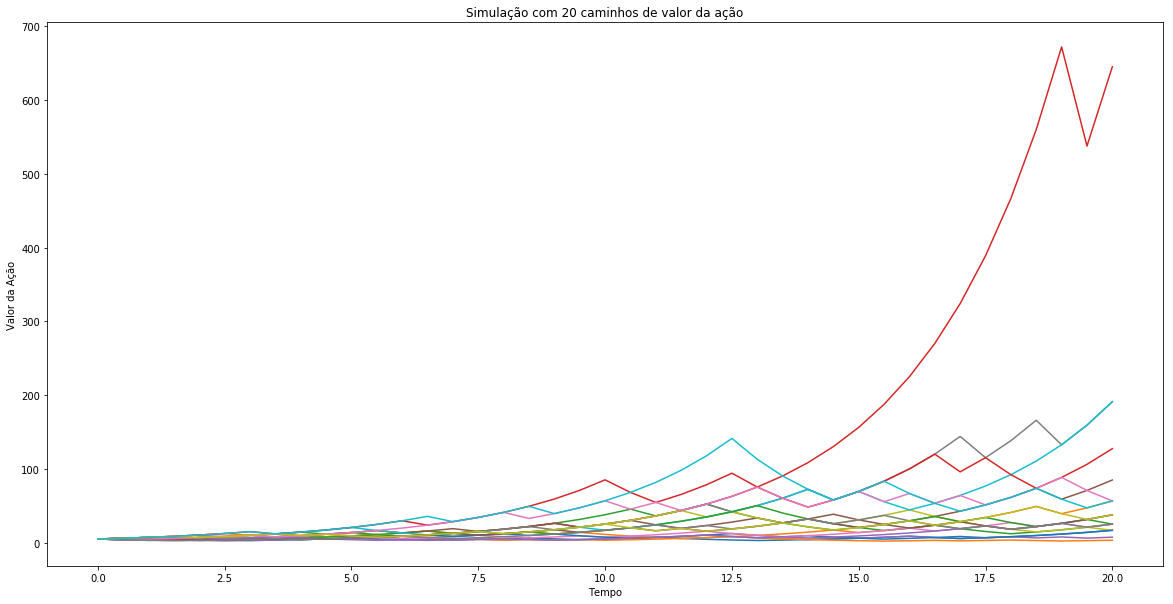

In [45]:
## Definição dos parametros
T = 20
dt = 0.5
S0 = 5
u = 1.2
d = 0.8
p = 0.65

## Construção da lista de valores da ação pelo tempo
x = [binomial(S0, T, dt, u, d, p) for i in range(0,20)]

## Inserir o valor inicial em cada lista
for i in range(0,20):
    x[i].insert(0,S0)
    
## Discretização do tempo
ts = np.linspace(0,20,41)

## Plot do gráfico
plt.figure(figsize=(20,10))
for i in range(0,20):
    plt.plot(ts,x[i])
plt.title('Simulação com 20 caminhos de valor da ação')
plt.xlabel('Tempo')
plt.ylabel('Valor da Ação')
plt.show()

Há um problema aqui, a maior parte dos caminhos de valor da ação estão convergindo para 0.
Portanto vamos analisar os gráficos na escala log em Y.
Identificarei cada curva com seu valor final

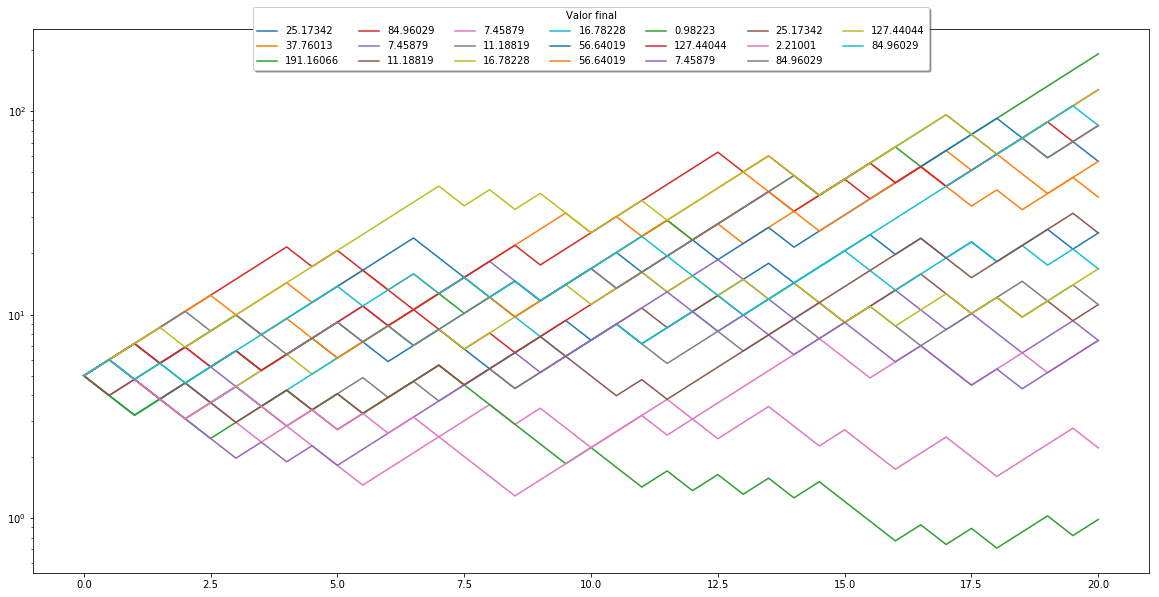

In [31]:
plt.figure(figsize=(20,10))
for i in range(0,20):
    plt.semilogy(ts,x[i],label="{0:.5f}".format(x[i][-1]))
plt.legend(title='Valor final', loc='upper center', fancybox=True, shadow=True, ncol=7, bbox_to_anchor=(0.5,1.05))
plt.title('Caminhos de valor da ação')
plt.show()

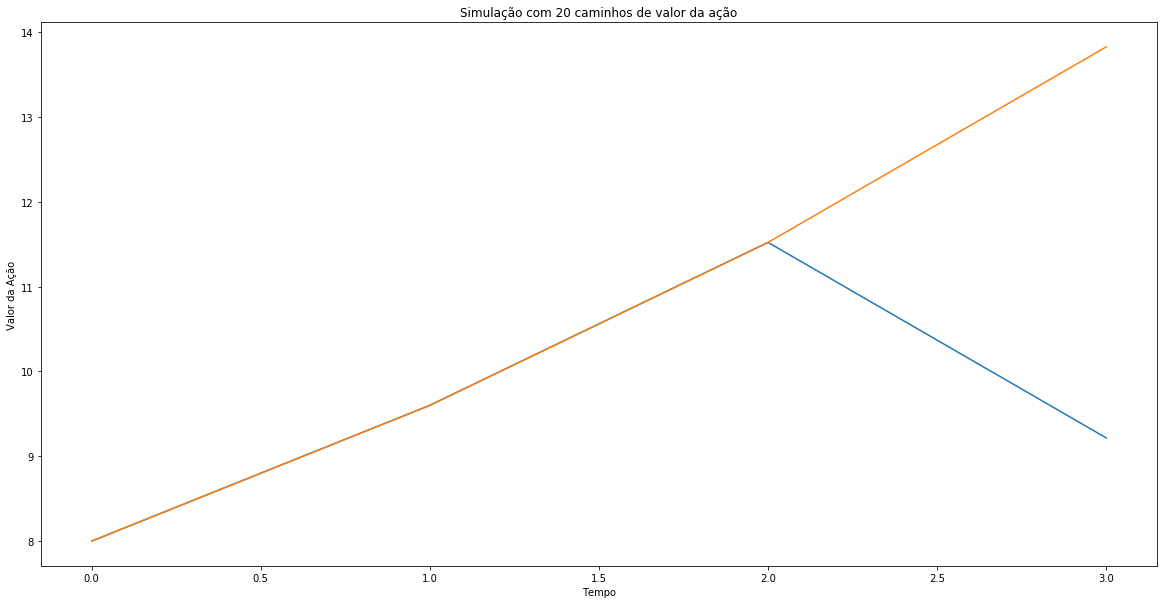

In [28]:
## Definição dos parametros
T = 3
dt = 1
S0 = 8
u = 1.2
d = 0.8
p = 0.6

## Construção da lista de valores da ação pelo tempo
x = [binomial(S0, T, dt, u, d, p) for i in range(0,2)]

## Inserir o valor inicial em cada lista
for i in range(0,2):
    x[i].insert(0,S0)
    
## Discretização do tempo
ts = np.linspace(0,3,4)

## Plot do gráfico
plt.figure(figsize=(20,10))
for i in range(0,2):
    plt.plot(ts,x[i])
plt.title('Simulação com 20 caminhos de valor da ação')
plt.xlabel('Tempo')
plt.ylabel('Valor da Ação')
plt.show()

In [29]:
x

[[8, 9.6, 11.52, 9.216], [8, 9.6, 11.52, 13.824]]

In [ ]:
for i in range(10000):
    y,z = binomial(S0, 20, dt, u, d, p)
    assert sum(z)==40

In [ ]:
y,z = binomial(S0, 20, dt, u, d, p)
z
y[-1]

In [ ]:
binomial(40,18)*p**z[0]*(1-p)**z[1]*y[-1]

In [ ]:
def esperanca()

In [ ]:
## Plot com escala log
plt.figure(figsize=(20,10))
for i in range(0,20):
    plt.semilogy(ts,x[i])
plt.show()

## Boxplot

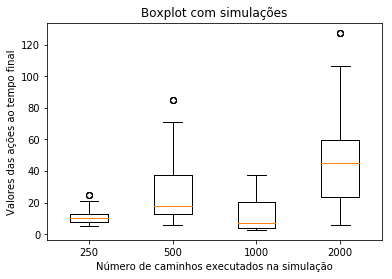

In [38]:
vs = []
med_1 = []

for j in [250,500,1000,2000]:
    vs.append([binomial(S0, T, dt, u, d, p) for i in range(0,j)])
vf = [i[-1] for i in vs]

for i in range(4):
    med_1.append(np.mean(vs[i]))

for v in vf:
    plt.boxplot(vf)
plt.title('Boxplot com simulações')
plt.ylabel('Valores das ações ao tempo final')
plt.xlabel('Número de caminhos executados na simulação')
plt.xticks([1,2,3,4],[250,500,1000,2000])
plt.show()

## Modificando os parâmetros

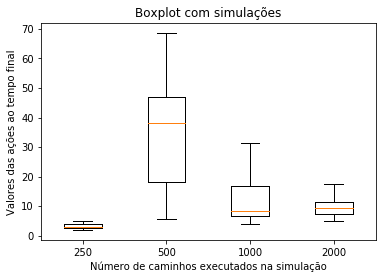

In [39]:
u_n = np.sqrt(u)
d_n = np.sqrt(d)
dt_n = dt/2

vs = []
med_2 = []
for j in [250,500,1000,2000]:
    vs.append([binomial(S0, T, dt_n, u_n, d_n, p) for i in range(0,j)])
vf = [i[-1] for i in vs]

for i in range(4):
    med_2.append(np.mean(vs[i]))

for v in vf:
    plt.boxplot(vf,showfliers=False)
plt.title('Boxplot com simulações')
plt.ylabel('Valores das ações ao tempo final')
plt.xlabel('Número de caminhos executados na simulação')
plt.xticks([1,2,3,4],[250,500,1000,2000])
plt.show()

In [42]:
med_1

[19.417421371040316, 20.928941723193873, 21.43513836380108, 21.45720620748834]